<a href="https://colab.research.google.com/github/brialln/Air-Data-Quality-Analysis-Using-R/blob/main/Air_Quality_Analysis_Linear_Regression_with_Regression_Line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this in a Python cell to set up R in Google Colab
!pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314952 sha256=405248904f1797ebbb0e9c23832e0a3cbe94fb133ba3c2e5a09afe6bca5b6ff9
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [ ]:
# Load the R magic
%load_ext rpy2.ipython

Rows: 216 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Combined Wind Direction
dbl  (7): PM2.5 Concentration, Dew Point, Temperature, Pressure, Combined Wi...
dttm (1): DateTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Summary of Linear Regression Model:

Call:
lm(formula = `PM2.5 Concentration` ~ Temperature, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-73.67 -43.68 -21.68  33.04 204.75 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  106.811     11.385   9.382   <2e-16 ***
Temperature    2.285      1.021   2.238   0.0262 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.56 on 214 degrees of freedom
Multiple R-squared:  0.02287,	Adjusted R-squared:  0.01831 
F-statistic: 5.009 on 1 and 214 DF,  p-value: 

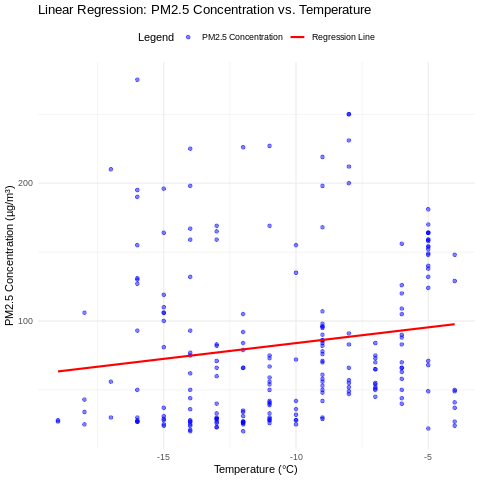

In [ ]:
%%R
# Load necessary libraries
library(readr)
library(ggplot2)

# Load the dataset
data <- read_csv("/content/R Language_ Project 3 - Air Quality Data - Air Quality in US embassy in Beijing, China.csv")

# Ensure 'PM2.5 Concentration' and 'Temperature' are numeric
data$`PM2.5 Concentration` <- as.numeric(data$`PM2.5 Concentration`)
data$Temperature <- as.numeric(data$Temperature)

# Remove rows with missing or invalid values
data <- na.omit(data)

# Perform Linear Regression
lm_model <- lm(`PM2.5 Concentration` ~ Temperature, data = data)

# Summary of the linear regression model
cat("Summary of Linear Regression Model:\n")
print(summary(lm_model))

# Create the plot with proper mapping for legend
plot <- ggplot(data, aes(x = Temperature, y = `PM2.5 Concentration`)) +
  geom_point(aes(color = "PM2.5 Concentration"), alpha = 0.5) +   # Mapping color for points
  geom_smooth(method = "lm", aes(color = "Regression Line"), se = FALSE) +   # Mapping color for regression line
  labs(
    title = "Linear Regression: PM2.5 Concentration vs. Temperature",
    x = "Temperature (°C)",
    y = "PM2.5 Concentration (µg/m³)"
  ) +
  theme_minimal() +
  scale_color_manual(
    name = "Legend",    # Title of the legend
    values = c("PM2.5 Concentration" = "blue", "Regression Line" = "red"),  # Assigning colors
    labels = c("PM2.5 Concentration", "Regression Line")  # Labels for the legend
  ) +
  theme(legend.position = "top")

# Display the plot in the console
print(plot)

# Save the plot as a PNG file
ggsave("pm25_vs_temperature.png", plot = plot, width = 8, height = 6)

cat("\nPlot has been saved as 'pm25_vs_temperature.png'.\n")

Rows: 216 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Combined Wind Direction
dbl  (7): PM2.5 Concentration, Dew Point, Temperature, Pressure, Combined Wi...
dttm (1): DateTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Summary of Linear Regression Model:

Call:
lm(formula = `PM2.5 Concentration` ~ `Dew Point`, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-71.68 -32.48 -17.62  22.43 203.03 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 163.1479    11.6381  14.018  < 2e-16 ***
`Dew Point`   4.5588     0.6295   7.242 7.86e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.19 on 214 degrees of freedom
Multiple R-squared:  0.1968,	Adjusted R-squared:  0.1931 
F-statistic: 52.45 on 1 and 214 DF,  p-value: 7.

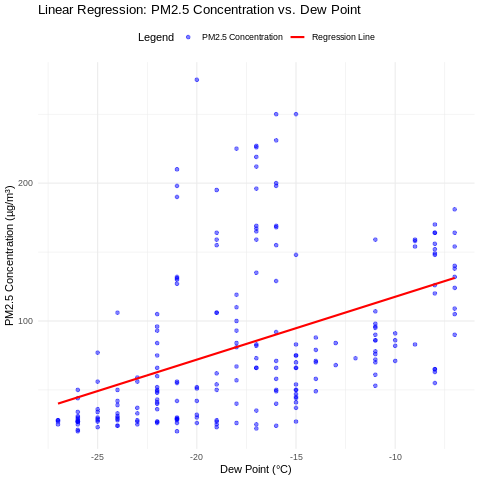

In [ ]:
%%R
# Load necessary libraries
library(readr)
library(ggplot2)

# Load the dataset
data <- read_csv("/content/R Language_ Project 3 - Air Quality Data - Air Quality in US embassy in Beijing, China.csv")

# Ensure 'PM2.5 Concentration' and 'Dew Point' are numeric
data$`PM2.5 Concentration` <- as.numeric(data$`PM2.5 Concentration`)
data$`Dew Point` <- as.numeric(data$`Dew Point`)

# Remove rows with missing or invalid values
data <- na.omit(data)

# Perform Linear Regression: PM2.5 Concentration vs Dew Point
lm_model <- lm(`PM2.5 Concentration` ~ `Dew Point`, data = data)

# Summary of the linear regression model
cat("Summary of Linear Regression Model:\n")
print(summary(lm_model))

# Create the plot with proper mapping for legend
plot <- ggplot(data, aes(x = `Dew Point`, y = `PM2.5 Concentration`)) +
  geom_point(aes(color = "PM2.5 Concentration"), alpha = 0.5) +   # Mapping color for points
  geom_smooth(method = "lm", aes(color = "Regression Line"), se = FALSE) +   # Mapping color for regression line
  labs(
    title = "Linear Regression: PM2.5 Concentration vs. Dew Point",
    x = "Dew Point (°C)",
    y = "PM2.5 Concentration (µg/m³)"
  ) +
  theme_minimal() +
  scale_color_manual(
    name = "Legend",    # Title of the legend
    values = c("PM2.5 Concentration" = "blue", "Regression Line" = "red"),  # Assigning colors
    labels = c("PM2.5 Concentration", "Regression Line")  # Labels for the legend
  ) +
  theme(legend.position = "top")

# Display the plot in the console
print(plot)

# Save the plot as a PNG file
ggsave("pm25_vs_dew_point.png", plot = plot, width = 8, height = 6)

cat("\nPlot has been saved as 'pm25_vs_dew_point.png'.\n")